# <p style="text-align:center">EE 379K: Lab Two</p>
# <p style="text-align:center">Kyle Grier and Stefan Bordovsky</p>
#### <p style="text-align:center">Due: Monday, 9/18, 3:00pm</p>

<p>
    <h1>Programming Questions</h1>
    <br>
    <ol type="1">
        <li>Correlations.
        </li>
    </ol>
</p>

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import itertools

import pandas as pd
import seaborn as sns

(a) When given a data matrix, an easy way to tell if any two columns are correlated is to
look at a scatter plot of each column against each other column. For a warm up, do this:
Look at the data in DF1 in Lab2.zip. Which columns are (pairwise) correlated? Figure
out how to do this with Pandas, and also how to do this with Seaborn.

Pairwise correlation matrix:
          0         1         2         3         4
0  1.000000 -0.003991  0.008789 -0.004044 -0.007086
1 -0.003991  1.000000 -0.003998  0.989869  0.004107
2  0.008789 -0.003998  1.000000 -0.003887 -0.989445
3 -0.004044  0.989869 -0.003887  1.000000  0.004662
4 -0.007086  0.004107 -0.989445  0.004662  1.000000


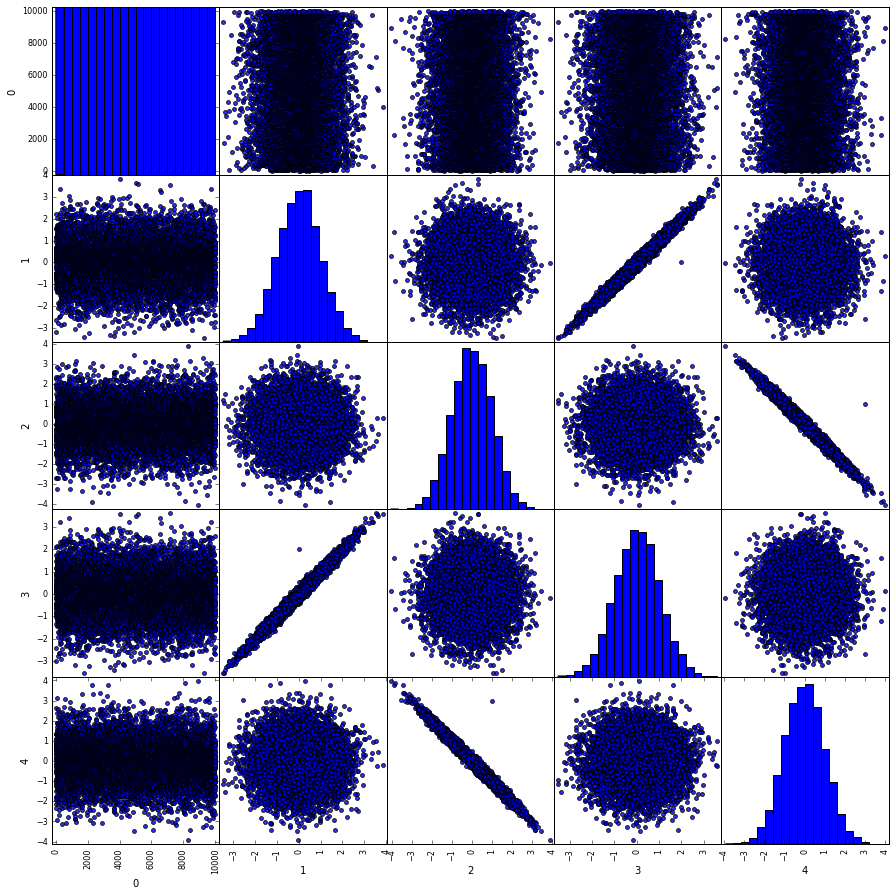

In [2]:
patient_data = pd.read_csv('DF1', header=None)

print("Pairwise correlation matrix:")
print(patient_data.corr()); # Calculate pairwise correlation matrix

# Plotting code found at https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame
grr = pd.scatter_matrix(patient_data, figsize=(15, 15),
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

# sns.set(style="ticks", color_codes=True)
# patient_data_sns = sns.load_dataset("./DF1")
# g = sns.pairplot(patient_data)


(b) Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4 x 4 matrix.
Explain why the numbers that you get fit with the plots you got.

<p>Explicit covariance matrix:
    <br>
    <div style="text-indent: 60px">Covariance: Cov(x, y) = $\frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{n-1}$
    </div>
    <br>
    <div style="text-indent: 60px">
        For N x M matrix X, covariance matrix C is an M x M matrix such that C(i,j) = Cov(X[:][i], X[:][j]) $\forall i, j \in \{0, 1, 2, ..., M\}$
    </div>
</p>
    

In [3]:
#print(patient_data[patient_data.columns[0]])
patient_data_transpose = patient_data.transpose()
print("The covariance matrix for data in DF1 is: ")
print(np.cov(patient_data_transpose))

The covariance matrix for data in DF1 is: 
[[        nan         nan         nan         nan         nan]
 [        nan  1.00145778 -0.00401212  0.99152339  0.00412212]
 [        nan -0.00401212  1.00537601 -0.003901   -0.99505906]
 [        nan  0.99152339 -0.003901    1.00188545  0.00468002]
 [        nan  0.00412212 -0.99505906  0.00468002  1.00597276]]


<p>
    The covariance values for columns of the dataset that appear correlated approach 1.00, while the covariance matrix values across the diagonal (that is, the variance of distributions of data from columns corresponding to that row/column number in the covariance matrix) approach 1, which is approximately the variance of distributions generated for the dataset.
</p>

<p>
(c) The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, Z = (X1;X2;X3) so that (X1;X2) and (X1;X3) are uncorre-
lated, but (X2;X3) are correlated. Specifically: choose a covariance matrix that has the
above correlations structure, and write this down. Then find a way to generate samples
from this Gaussian. Choose one of the non-zero covariance terms (Cij , if C denotes
your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.
</p>

A covariance matrix that has the above correlations structure is as follows:
[[ 1.    0.    0.  ]
 [ 0.    1.    0.99]
 [ 0.    0.99  1.  ]]


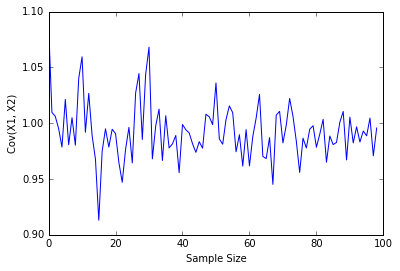

In [4]:
cov_matrix = np.matrix([[1, 0, 0],
             [0, 1, 0.99],
             [0, 0.99, 1]])
print("A covariance matrix that has the above correlations structure is as follows:")
print(cov_matrix)

sample_size_limit = 10000
step_size = 100;
covariance_array = []

for i in range(100, sample_size_limit, step_size):
    gaussian_matrix = np.random.multivariate_normal([0, 0, 0], [[1, 0, 0],[0, 1, 0.99],[0, 0.99, 1]], i)
    gm_transpose = gaussian_matrix.transpose()
    covariance_matrix = np.cov(gm_transpose)
    covariance_array.append(covariance_matrix[2][1])
    

plt.plot(covariance_array)
plt.ylabel('Cov(X1, X2)')
plt.xlabel('Sample Size')
plt.show()


<p>
    2. Outliers. Consider the two-dimensional data in DF2 in Lab2.zip. Look at a scatter plot
of the data. It contains two points that look like potential outliers. Which one is "more"
outlying? Propose a transformation of the data that makes it clear that the point at (-1; 1)
is more outlying than the point at (5.5; 5), even though the latter point is "farther away"
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if y comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and
$$
Q =
\begin{pmatrix}
2 & \frac{1}{2} \\
\frac{1}{2} & 2
\end{pmatrix}
$$
what is the covariance matrix of the random variable z = Qy? If you are given z, how would
you create a random Gaussian vector with covariance equal to the identity, using z?
</p>

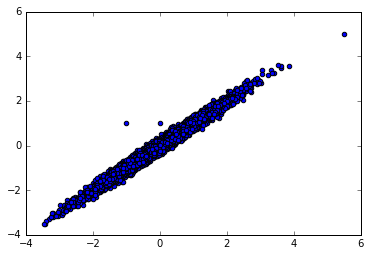

[[ 1.00454731  0.99414217]
 [ 0.99414217  1.00415759]]


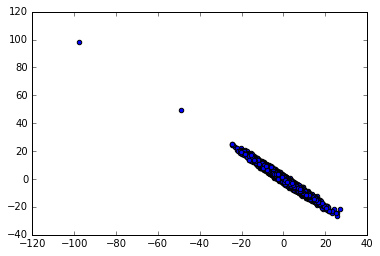

In [38]:
from numpy.linalg import inv

DF2 = pd.read_csv('DF2', header=None)
#print(DF2)
plt.scatter(DF2[:][1], DF2[:][2])
#plt.xlim(-2, 10)
plt.show()

Q = np.matrix([[2, 1/2],
    [1/2, 2]])

z = np.row_stack([DF2[:][1], DF2[:][2]])
z_cov = np.cov(z)
print(z_cov)
y = np.matmul(inv(z_cov), z)
plt.scatter(y[:][0], y[:][1])
plt.show()

<p> 3. Even More Standard Error <br>
    <div style="text-indent:60px">
        (a) By creating fresh data and each time computing ^ B and recording ^ B - B, compute the
empirical standard deviation of the error for n = 150 (the number we used in class). In
class, in the exercise where I tried to find a linear regression of y vs. noise, we found
^B  = -0.15. Given your empirical computation of the standard deviation of the error,
how significant is the value -0.15?
    </div>
</p>

In [40]:
mean = 0
std_dev = 1
n = 150
B0 = -3
B = 0
y = np.zeros(n)

x = np.random.normal(mean, std_dev, n) # mean = 0, num_samples = 150
e = np.random.normal(mean, std_dev, n) # mean = 0, num_samples = 150
for i in range(n):
    y[i] = B0 + (x[i] * B) + e[i] 

<p> 4. Names and Frequencies. The goal of this exercise is for you to get more experience with
Pandas, and to get a chance to explore a cool data set. Download the le Names.zip from
Canvas. This contains the frequency of all names that appeared more than 5 times on a social
security application from 1880 through 2015. <br>
    <div style="text-indent:60px">
        (a) Write a program that on input k and XXXX, returns the top k names from year
XXXX.
    </div>
</p>

In [90]:
def top_k_names(k, year):
    first_male_index = -1
    file_name = "yob" + str(year) + ".txt"
    name_data = pd.read_csv(file_name)
    for index in range(name_data.shape[0]):
        if name_data.iat[index, 1] == 'M':
            first_male_index = index
            break
    female_index = 0
    male_index = first_male_index
    to_return = []
    for i in range(k):
        if name_data.iat[female_index, 2] > name_data.iat[male_index, 2]:
            #print(female_index)
            to_return.insert(len(to_return), (name_data.iat[female_index, 0]))
            female_index = female_index + 1
        else:
            #print(male_index)
            to_return.append(name_data.iat[male_index, 0])
            male_index = male_index + 1
    return to_return

def name_frequency(name):
    for year in range(1880, 2015, 1):
        file_name = "yob" + str(year) + ".txt"
        name_data = pd.read_csv(file_name)
        for index in range(name_data.shape[0]):
            9

#print(top_k_names(10, 2010))

patient_data = pd.read_csv('yob2015.txt', header=None)
patient_data.head(5)

,0,1,2
0,Emma,F,20355
1,Olivia,F,19553
2,Sophia,F,17327
3,Ava,F,16286
4,Isabella,F,15504


In [110]:
def name_gender_swaps(name):
    name_dict = {}
    names_for_all_years = {}
    swapped_preference_names = {}
    # Generate a dictionary of names for each year with key = name, value = gender label for gender with highest frequency of key name
    for year in range(1880, 2015, 1):
        file_name = "yob" + str(year) + ".txt"
        name_dict.update({str(year): {}})
        gender_pref_dict = {}
        female_names = {}
        male_names = {}
        all_names = {}
        name_data = pd.read_csv(file_name)
        
        # For each name in the text file for a given year, record the name in all_names dictionary, names_for_all_years dict
        # Note frequency of a given name for males in male_names and for females in female_names
        for index in range(name_data.shape[0]):
            all_names.update({str(name_data.iat[index, 0]): name_data.iat[index, 0]})
            names_for_all_years.update({str(name_data.iat[index, 0]): name_data.iat[index, 0]})
            if name_data.iat[index, 1] == 'M':
                male_names.update({str(name_data.iat[index, 0]): name_data.iat[index, 2]})
            else:
                female_names.update({str(name_data.iat[index, 0]): name_data.iat[index, 2]})
        
        # For each name in this given year, if frequency of name for females is > frequency of name for males, update entry for this year
        # in name_dict with that name and the gender label of highest frequency. Vice versa for frequency males > frequency females.
        for key in all_names:
            if( key in male_names and key in female_names):
                if(male_names[key] > female_names[key]):
                    gender_pref_dict.update({key: 'M'})
                else:
                    gender_pref_dict.update({key: 'F'})
            elif( key in male_names ):
                gender_pref_dict.update({key: 'M'})
            elif( key in female_names ):
                gender_pref_dict.update({key: 'F'})
                
        name_dict.update({str(year): gender_pref_dict})
    
    # For each name found across all years, check if name-by-gender frequency ever switched from M to F.
    for key in names_for_all_years:
        print(key)
        last_gender_val = 'null'
        for year in range(1880, 2015, 1):
            this_year_dict = name_dict[str(year)]
            if(key in this_year_dict):
                if last_gender_val == 'null':
                    last_gender_val = this_year_dict[key]
                # If name-by-gender frequency switches, record year of the switch and name in swapped_preference_names.
                elif(last_gender_val != this_year_dict[key]):
                    swapped_preference_names.update({key: year})
                    print(key)
                    break;
                    
    print(swapped_preference_names)
    
            
                
name_gender_swaps('Sarah')

Dejamarie
Annabellah
Charelle
Dago
Jhase
Derika
Katavia
Derike
Zakharia
Jazzmon
Destane
Eury
Destani
Deklyn
Yadria
Eura
Eura
Alyk
Western
Vasken
Quenette
Quenetta
Sherlita
Tootie
Phyllistine
Valli
Issaac
Valle
Blade
Ayleen
Valla
Vikrant
Mizell
Vally
Alya
Morten
Lajoia
Yadhir
Endyia
Tawsif
Courtany
Daryen
Daryen
Daryel
Idellar
Elizet
Nathinel
Miera
Maydell
Nonnie
Garyon
Duwanna
Xochi
Ilcia
Anyka
Wathena
Danamarie
Covey
Alanee
Hamilton
Antwion
Kendrall
Malaisia
Hannahjo
Isahbella
Amren
Shigetoshi
Kamarionna
Ferlin
Elfida
Stana
Bronda
Norlene
Shurman
Hafiz
Harver
Eann
Kyshia
Synceer
Harvey
Muizz
Shanitra
Henchy
Harvel
Leiland
Leilane
Halona
Jamikal
Mathijs
Dazhane
Vernor
Leilani
Vernon
Mersades
Ervie
Ervie
Coreta
Golnaz
Zenola
Taide
Delanea
Mersadez
Leilany
Annetha
Mertis
Timtohy
Ziair
Aixa
Leandros
Gregson
Yaimara
Mertie
Miina
Kamelah
Euri
Kynadie
Mertin
Indigo
Edgardo
Cheire
Katreina
Alexuss
Jadynce
Tabiatha
Zarelia
Kayce
Samerah
Saharra
Aabha
Trillion
Akeyra
Keiyanna
Deguan
Kahreem
Che

In [141]:
import string

def tweet_state_finder(row, state_names_dict, state_abbr_dict):
    
    location_str = row['user_location']
    if (location_str is None):
        return "null"
    if(len(location_str) > 0):
        print(location_str[0])
        tokens = location_str[0].split()
    
    for token in tokens:
        name = token.translate(None, string.punctuation)
        if name in state_names_dict:
            return name
        elif name in state_abbr_dict:
            return state_abbr_dict[name]

    return "null"

tweets = pd.read_csv("tweets.csv")
tweets.head(200)

state_names_dict = {}
state_abbr_dict = {}
tweets_by_state = {}

state_names = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
state_abbr = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

for index in range(len(state_abbr)):
    state_abbr_dict.update({state_abbr[index] : state_names[index]})

for index in range(len(state_names)):
    state_names_dict.update({state_names[index] : state_names})
    tweets_by_state.update({state_names[index]: 0})
    
for index in range(tweets.shape[0]):
    row = tweets.iloc[[index]]
    state_of_origin = tweet_state_finder(row, state_names_dict, state_abbr_dict)
    if (state_of_origin != "null"):
        num_tweets = tweets_by_state[state_of_origin]
        tweets_by_state.update({str(row['id']): num_tweets + 1})
    
print(tweets_by_state)

Wheeling WV


KeyError: 0